<a href="https://colab.research.google.com/github/WayneNcube19/Climate-Data-Analysis/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

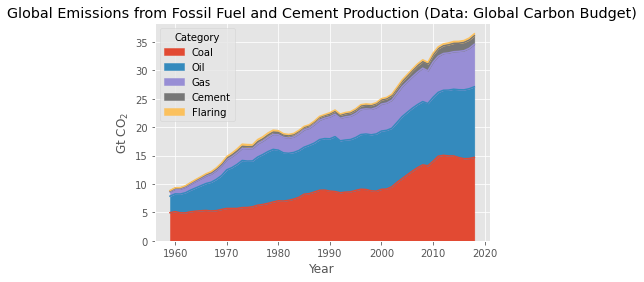

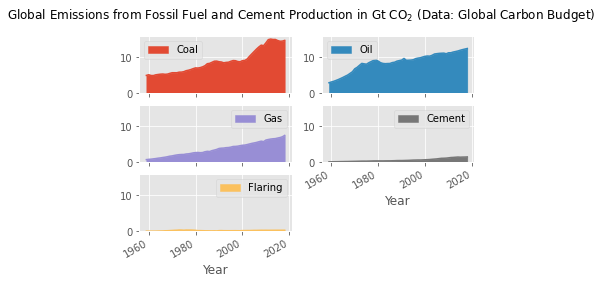

In [5]:
 
#References
# Global Carbon Project. (2019). Supplemental data of Global Carbon Budget 2019 (Version 1.0) [Data set]. Global Carbon Project. https://doi.org/10.18160/gcp-2019 */
 
 
import math
 
import matplotlib.pyplot as plt
plt.rcParams.update({'mathtext.default': 'regular'})
plt.style.use("ggplot")
!pip install pandas_datapackage_reader &> /dev/null
 
from pandas_datapackage_reader import read_datapackage
 
ffc = read_datapackage("https://github.com/openclimatedata/global-carbon-budget","fossil-fuel-cement")
ffc.head()
 
ffc = ffc.drop("Source", axis=1).reset_index().pivot(columns="Category", values="Value", index="Year")
 
ffc_Gt_CO2 = ffc[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring"]] * 3.664 / 1000
ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]].plot.area(stacked=True)
plt.title("Global Emissions from Fossil Fuel and Cement Production (Data: Global Carbon Budget)")
plt.ylabel("Gt CO$_2$");
 
plt.savefig("Global_CO2_Emissions.png")
 
subcategories = ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]] 
ymax = math.ceil(subcategories.max(axis=1).max())
axes = subcategories.plot.area(subplots=True, layout=(3,2), ylim=(0, ymax))
plt.suptitle("Global Emissions from Fossil Fuel and Cement Production in Gt CO$_2$ (Data: Global Carbon Budget)");
plt.savefig("Seperated_emission_data.png")